    如何做协整：对于{x}{Y}两个随机变量序列，将x对y回归，得到y = a+bx+e，e = y-bx,其中e是白噪声，对于e标准化即可
    np.polyfit(x,y,n) n是回归次数

In [2]:
import numpy as np
import pandas as pd
import tushare as ts
%matplotlib inline
import matplotlib.pyplot as plt

### 1.数据准备&回测准备

In [3]:
data1 = ts.get_k_data('600199','2013-06-01','2014-12-31')[['date','close']]
data2 = ts.get_k_data('600702','2013-06-01','2014-12-31')['close']
data = pd.concat([data1,data2],axis=1)
data.set_index('date',inplace=True)
stock_pair = ['600199','600702']
data.columns = stock_pair
data.head()

,600199,600702
date,,
2013-06-03,15.480,17.320
2013-06-04,14.856,16.930
2013-06-05,15.019,17.144
2013-06-06,14.645,16.843
2013-06-07,14.222,16.609


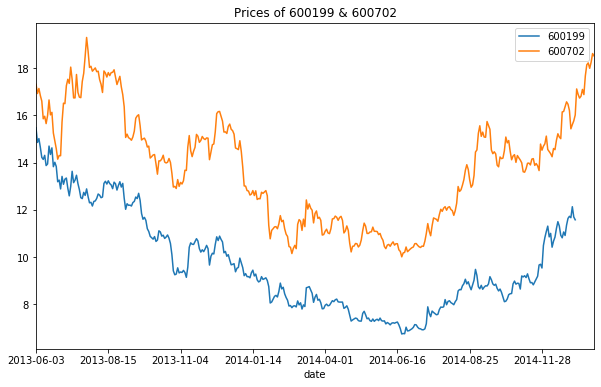

In [6]:
data.plot(title='Prices of 600199 & 600702',figsize=(10,6))

### 2.策略开发思路

In [7]:
data.corr()

,600199,600702
600199,1.000000,0.880779
600702,0.880779,1.000000


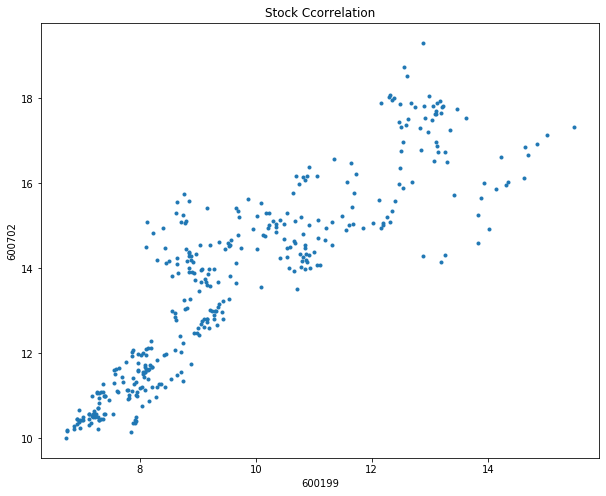

In [13]:
plt.figure(figsize=(10,8))
plt.title('Stock Ccorrelation')
plt.plot(data['600199'],data['600702'],'.')
plt.xlabel('600199')
plt.ylabel('600702')
data.dropna(inplace=True)

In [22]:
[slope,intercept] = np.polyfit(data['600199'],data['600702'],1).round(2)
print('The slope is %f,and the intercept is %f'%(slope,intercept))

The slope is 0.970000,and the intercept is 4.280000


In [25]:
data['spread'] = data.iloc[:,1]-(data.iloc[:,0]*slope+intercept)
data['zscore'] = (data['spread']- data['spread'].mean())/ data['spread'].std()

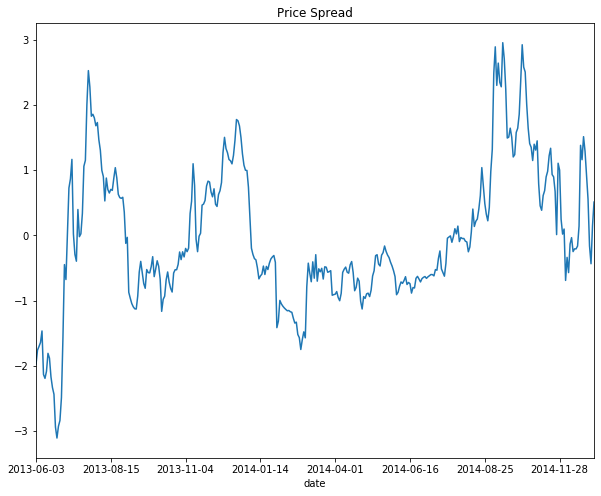

In [26]:
data['spread'].plot(figsize=(10,8),title='Price Spread')

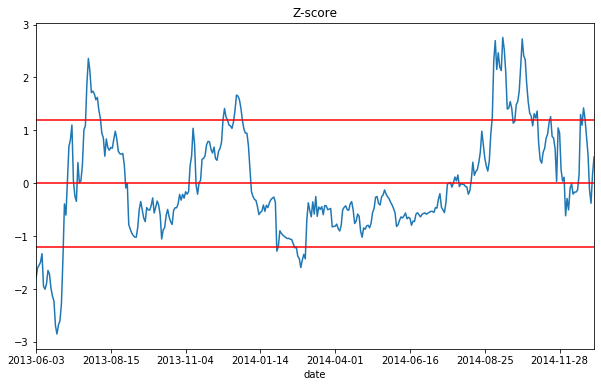

In [33]:
data['zscore'].plot(figsize=(10,6),title='Z-score')
plt.axhline(1.2,color = 'r')
plt.axhline(0,color='r')
plt.axhline(-1.2,color='r')

#### 产生交易信号

In [41]:
#由于 spread= y-ax-b,注意position的方向，即spread>threshold时，long199，short702

threshold=1.2
data['position_702'] = np.where(data['zscore']>threshold,-1,np.nan)
data['position_702'] = np.where(data['zscore']<-threshold,1,data['position_702'])
data['position_702'] = np.where(abs(data['zscore'])<0.5,0,data['position_702'])
data['position_702'] = data['position_702'].ffill()
data['position_199'] = -np.sign(data['position_702'])

data.tail(20)

,600199,600702,spread,zscore,position,position_1,position_2,position_702,position_199
date,,,,,,,,,
2014-12-04,11.308,14.558,-0.69076,-0.615359,0.0,0.0,-0.0,0.0,-0.0
2014-12-05,10.852,14.469,-0.33744,-0.288622,0.0,0.0,-0.0,0.0,-0.0
2014-12-08,11.000,14.379,-0.57100,-0.504610,0.0,0.0,-0.0,0.0,-0.0
2014-12-09,10.415,14.250,-0.13255,-0.099148,0.0,0.0,-0.0,0.0,-0.0
2014-12-10,10.673,14.598,-0.03481,-0.008762,0.0,0.0,-0.0,0.0,-0.0
2014-12-11,10.842,14.548,-0.24874,-0.206596,0.0,0.0,-0.0,0.0,-0.0
2014-12-12,11.209,14.946,-0.20673,-0.167747,0.0,0.0,-0.0,0.0,-0.0
2014-12-15,11.496,15.224,-0.20712,-0.168108,0.0,0.0,-0.0,0.0,-0.0
2014-12-16,11.308,15.085,-0.16376,-0.128010,0.0,0.0,-0.0,0.0,-0.0


In [42]:
data['returns_199'] = np.log(data['600199']/data['600199'].shift(1))
data['returns_702'] = np.log(data['600702']/data['600702'].shift(1))
data['strategy'] = 0.5*(data['position_199'].shift(1)*data['returns_199']+ data['position_702'].shift(1) * data['returns_702'])
# 资金等权——0.5
data.head()

,600199,600702,spread,zscore,position,position_1,position_2,position_702,position_199,returns_199,returns_702,strategy
date,,,,,,,,,,,,
2013-06-03,15.480,17.320,-1.97560,-1.803530,1.0,1.0,-1.0,1.0,-1.0,NaN,NaN,NaN
2013-06-04,14.856,16.930,-1.76032,-1.604447,1.0,1.0,-1.0,1.0,-1.0,-0.041145,-0.022775,0.009185
2013-06-05,15.019,17.144,-1.70443,-1.552762,1.0,1.0,-1.0,1.0,-1.0,0.010912,0.012561,0.000824
2013-06-06,14.645,16.843,-1.64265,-1.495630,1.0,1.0,-1.0,1.0,-1.0,-0.025217,-0.017713,0.003752
2013-06-07,14.222,16.609,-1.46634,-1.332586,1.0,1.0,-1.0,1.0,-1.0,-0.029309,-0.013990,0.007659


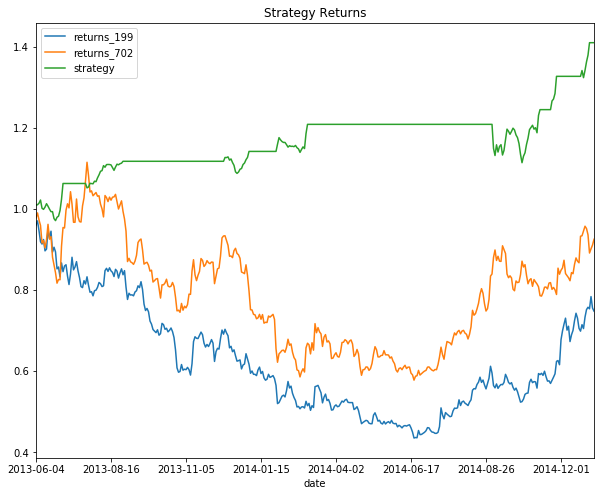

In [44]:
data[['returns_199','returns_702','strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10,8),title='Strategy Returns')

### 3.计算年化收益

In [56]:
ER = data['strategy'].mean() *252
print('年化收益为 %f'%ER)
sigma = data['strategy'].std() *252**0.5
print('年化标准差为%f'%sigma)

年化收益为 0.231847
年化标准差为0.113534


    策略的风险和问题：
    1.spread 不回归的风险，当市场结构发生重大变化时，用过去历史回顾出来的spread会发生不回归的风险
    2.中国市场做空受到限制
    3.回归系数没有rebalancing
    4.没有考虑交易成本